In [12]:
#Dependencies

In [250]:
import pandas as pd
from pathlib import Path
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')
%matplotlib inline

In [251]:
#Creating A Path to the CSV file

In [252]:
csv_path = Path("./data_files/urban_connectivity.csv")

In [253]:
#Read in the CSV File

In [254]:
urban_connectivity = pd.read_csv('urban_connectivity.csv')
population = pd.read_csv("population.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'urban_connectivity.csv'

In [77]:
#Print the CSV File

In [78]:
urban_connectivity

,Unnamed: 0,Place_name,City,State,Walk Score,Transit Score,Bike Score,Population_2021,Population_2022_Census,City_Population_Stats_adjusted_land_area__acres_,...,Number_of_Splashpads,Number_of_Swimming_pools,Number_of_Disc_Golf_Courses,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks,Permanent_car_free_roadways
0,0,"Los Angeles, CA",Los Angeles,CA,68.6,52.9,58.7,3792621,3903648.0,296527.0,...,17.0,64.0,4.0,33.00,33.00,1.0,0.0,133.0,0.00,0.0
1,1,"San Diego, CA",San Diego,CA,53.3,37.3,43.0,1307402,1394592.0,206371.0,...,4.0,14.0,3.0,66.20,292.80,0.0,50.0,8.0,0.00,0.0
2,2,"San Jose, CA",San Jose,CA,50.5,40.1,61.5,945942,1018924.0,112666.0,...,2.0,6.0,1.0,75.60,37.90,0.0,0.0,42.0,0.00,0.0
3,3,"San Francisco, CA",San Francisco,CA,88.7,77.1,72.3,805235,883822.0,29892.0,...,11.0,12.0,2.0,51.35,34.00,3.0,0.0,5.0,7.00,4.0
4,4,"Fresno, CA",Fresno,CA,46.6,33.1,58.1,494665,547499.0,72537.0,...,7.0,9.0,1.0,2.00,0.00,10.0,0.0,17.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,"Wichita, KS",Wichita,KS,34.8,19.7,43.9,382368,399769.0,101231.0,...,11.0,6.0,7.0,88.53,12.26,8.0,0.0,15.0,0.00,0.0
98,98,"Anchorage, AK",Anchorage,AK,30.9,21.6,51.8,291826,290509.0,1087624.0,...,0.0,5.0,2.0,135.00,0.00,0.0,0.0,2.0,0.00,0.0
99,99,"Boise, ID",Boise City,ID,38.5,22.6,62.3,205671,240861.0,52046.0,...,6.0,7.0,2.0,34.10,49.00,0.0,0.0,4.0,0.13,0.0
100,100,"Albuquerque, NM",Albuquerque,NM,42.6,28.6,60.9,545852,567242.0,113711.0,...,4.0,12.0,3.0,160.00,0.00,0.0,0.0,20.0,0.00,0.0


In [79]:
#Set The index to the city name

In [80]:
urban_connectivity = urban_connectivity.set_index("City")

In [81]:
#Print the first five rows of the data frame

In [82]:
urban_connectivity.head()

,Unnamed: 0,Place_name,State,Walk Score,Transit Score,Bike Score,Population_2021,Population_2022_Census,City_Population_Stats_adjusted_land_area__acres_,City_Population_Stats_density__people_acre_,...,Number_of_Splashpads,Number_of_Swimming_pools,Number_of_Disc_Golf_Courses,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks,Permanent_car_free_roadways
City,,,,,,,,,,,,,,,,,,,,,
Los Angeles,0,"Los Angeles, CA",CA,68.6,52.9,58.7,3792621,3903648.0,296527.0,13.164562,...,17.0,64.0,4.0,33.00,33.0,1.0,0.0,133.0,0.0,0.0
San Diego,1,"San Diego, CA",CA,53.3,37.3,43.0,1307402,1394592.0,206371.0,6.757694,...,4.0,14.0,3.0,66.20,292.8,0.0,50.0,8.0,0.0,0.0
San Jose,2,"San Jose, CA",CA,50.5,40.1,61.5,945942,1018924.0,112666.0,9.043758,...,2.0,6.0,1.0,75.60,37.9,0.0,0.0,42.0,0.0,0.0
San Francisco,3,"San Francisco, CA",CA,88.7,77.1,72.3,805235,883822.0,29892.0,29.567175,...,11.0,12.0,2.0,51.35,34.0,3.0,0.0,5.0,7.0,4.0
Fresno,4,"Fresno, CA",CA,46.6,33.1,58.1,494665,547499.0,72537.0,7.547858,...,7.0,9.0,1.0,2.00,0.0,10.0,0.0,17.0,0.0,0.0


In [83]:
#Create a data frame using the 10 selected cities for the project

In [84]:
urban_connectivity_df = urban_connectivity.loc[["Chicago", "New York", "Los Angeles", "Nashville","Boston","Austin","Atlanta","San Diego","Denver","Tampa"]]

In [85]:
#Print the data frame

In [86]:
urban_connectivity_df

,Unnamed: 0,Place_name,State,Walk Score,Transit Score,Bike Score,Population_2021,Population_2022_Census,City_Population_Stats_adjusted_land_area__acres_,City_Population_Stats_density__people_acre_,...,Number_of_Splashpads,Number_of_Swimming_pools,Number_of_Disc_Golf_Courses,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks,Permanent_car_free_roadways
City,,,,,,,,,,,,,,,,,,,,,
Chicago,17,"Chicago, IL",IL,77.2,65.0,72.2,2695598,2750534.0,136157.0,20.201194,...,242.0,79.0,2.0,80.2,104.70,1.0,31.0,27.0,0.0,0.0
New York,21,"New York, NY",NY,88.0,88.6,69.3,8175133,8840134.0,186181.0,47.481397,...,595.0,66.0,14.0,445.5,353.00,82.0,27.0,179.0,24.0,4.0
Los Angeles,0,"Los Angeles, CA",CA,68.6,52.9,58.7,3792621,3903648.0,296527.0,13.164562,...,17.0,64.0,4.0,33.0,33.00,1.0,0.0,133.0,0.0,0.0
Nashville,81,"Nashville/Davidson, TN",TN,28.8,21.7,29.7,601222,714169.0,299313.0,2.386027,...,4.0,10.0,5.0,131.5,100.00,35.0,0.0,8.0,0.0,0.0
Boston,47,"Boston, MA",MA,82.8,72.4,69.4,617594,685476.0,29222.0,23.457532,...,86.0,28.0,0.0,4.0,0.00,2.0,0.0,1.0,0.0,0.0
Austin,55,"Austin, TX",TX,41.7,34.8,54.0,790390,1003496.0,172115.0,5.830381,...,17.0,34.0,6.0,160.5,119.06,7.0,15.0,26.0,0.0,0.0
Atlanta,40,"Atlanta, GA",GA,47.7,43.7,41.7,420003,515426.0,85564.0,6.023865,...,10.0,33.0,1.0,114.0,0.00,5.0,2.0,30.0,0.5,0.5
San Diego,1,"San Diego, CA",CA,53.3,37.3,43.0,1307402,1394592.0,206371.0,6.757694,...,4.0,14.0,3.0,66.2,292.80,0.0,50.0,8.0,0.0,0.0
Denver,67,"Denver, CO",CO,61.2,44.6,71.8,600158,744729.0,74662.0,9.974673,...,20.0,32.0,2.0,328.0,0.00,0.0,0.0,13.0,5.5,0.0


In [87]:
#Create a new data frame with only the pertinant columns for the project (State, Walk Score, Transit Score, Bike Score)

In [88]:
new_urban_connectivity_df = urban_connectivity_df[["State", "Walk Score", "Transit Score", "Bike Score"]]
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score
City,,,,
Chicago,IL,77.2,65.0,72.2
New York,NY,88.0,88.6,69.3
Los Angeles,CA,68.6,52.9,58.7
Nashville,TN,28.8,21.7,29.7
Boston,MA,82.8,72.4,69.4
Austin,TX,41.7,34.8,54.0
Atlanta,GA,47.7,43.7,41.7
San Diego,CA,53.3,37.3,43.0
Denver,CO,61.2,44.6,71.8


In [89]:
#Create a new column called "Walk Score Rank" and rank each city by the given walk score

In [90]:
new_urban_connectivity_df['Walk Score Rank'] = new_urban_connectivity_df['Walk Score'].rank()
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score,Walk Score Rank
City,,,,,
Chicago,IL,77.2,65.0,72.2,8.0
New York,NY,88.0,88.6,69.3,10.0
Los Angeles,CA,68.6,52.9,58.7,7.0
Nashville,TN,28.8,21.7,29.7,1.0
Boston,MA,82.8,72.4,69.4,9.0
Austin,TX,41.7,34.8,54.0,2.0
Atlanta,GA,47.7,43.7,41.7,3.0
San Diego,CA,53.3,37.3,43.0,5.0
Denver,CO,61.2,44.6,71.8,6.0


In [91]:
#Create a new column called "Transit Score Rank" and rank each city by the given transit score

In [92]:
new_urban_connectivity_df['Transit Score Rank'] = new_urban_connectivity_df['Transit Score'].rank()
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score,Walk Score Rank,Transit Score Rank
City,,,,,,
Chicago,IL,77.2,65.0,72.2,8.0,8.0
New York,NY,88.0,88.6,69.3,10.0,10.0
Los Angeles,CA,68.6,52.9,58.7,7.0,7.0
Nashville,TN,28.8,21.7,29.7,1.0,1.0
Boston,MA,82.8,72.4,69.4,9.0,9.0
Austin,TX,41.7,34.8,54.0,2.0,3.0
Atlanta,GA,47.7,43.7,41.7,3.0,5.0
San Diego,CA,53.3,37.3,43.0,5.0,4.0
Denver,CO,61.2,44.6,71.8,6.0,6.0


In [93]:
#Create a new column called "Bike Score Rank" and rank each city by the given Bike score

In [94]:
new_urban_connectivity_df['Bike Score Rank'] = new_urban_connectivity_df['Bike Score'].rank()
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score,Walk Score Rank,Transit Score Rank,Bike Score Rank
City,,,,,,,
Chicago,IL,77.2,65.0,72.2,8.0,8.0,10.0
New York,NY,88.0,88.6,69.3,10.0,10.0,7.0
Los Angeles,CA,68.6,52.9,58.7,7.0,7.0,6.0
Nashville,TN,28.8,21.7,29.7,1.0,1.0,1.0
Boston,MA,82.8,72.4,69.4,9.0,9.0,8.0
Austin,TX,41.7,34.8,54.0,2.0,3.0,4.0
Atlanta,GA,47.7,43.7,41.7,3.0,5.0,2.0
San Diego,CA,53.3,37.3,43.0,5.0,4.0,3.0
Denver,CO,61.2,44.6,71.8,6.0,6.0,9.0


In [95]:
#Create a new column called "Total Urban Score" which should be the sum of the values in columns "Walk Score Rank", "Transit Score Rank" and "Bike Score Rank".
#Print the new data frame.

In [96]:
new_urban_connectivity_df['Total Urban Score'] = new_urban_connectivity_df['Walk Score Rank'] + new_urban_connectivity_df['Transit Score Rank'] + new_urban_connectivity_df['Bike Score Rank']

In [97]:
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score,Walk Score Rank,Transit Score Rank,Bike Score Rank,Total Urban Score
City,,,,,,,,
Chicago,IL,77.2,65.0,72.2,8.0,8.0,10.0,26.0
New York,NY,88.0,88.6,69.3,10.0,10.0,7.0,27.0
Los Angeles,CA,68.6,52.9,58.7,7.0,7.0,6.0,20.0
Nashville,TN,28.8,21.7,29.7,1.0,1.0,1.0,3.0
Boston,MA,82.8,72.4,69.4,9.0,9.0,8.0,26.0
Austin,TX,41.7,34.8,54.0,2.0,3.0,4.0,9.0
Atlanta,GA,47.7,43.7,41.7,3.0,5.0,2.0,10.0
San Diego,CA,53.3,37.3,43.0,5.0,4.0,3.0,12.0
Denver,CO,61.2,44.6,71.8,6.0,6.0,9.0,21.0


In [98]:
#Create a new column called "Total Urban Score Rank".  This column should rank the cities by the total urban score previously calculated.

In [99]:
new_urban_connectivity_df['Total Urban Score Rank'] = new_urban_connectivity_df['Total Urban Score'].rank()
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score,Walk Score Rank,Transit Score Rank,Bike Score Rank,Total Urban Score,Total Urban Score Rank
City,,,,,,,,,
Chicago,IL,77.2,65.0,72.2,8.0,8.0,10.0,26.0,8.5
New York,NY,88.0,88.6,69.3,10.0,10.0,7.0,27.0,10.0
Los Angeles,CA,68.6,52.9,58.7,7.0,7.0,6.0,20.0,6.0
Nashville,TN,28.8,21.7,29.7,1.0,1.0,1.0,3.0,1.0
Boston,MA,82.8,72.4,69.4,9.0,9.0,8.0,26.0,8.5
Austin,TX,41.7,34.8,54.0,2.0,3.0,4.0,9.0,2.0
Atlanta,GA,47.7,43.7,41.7,3.0,5.0,2.0,10.0,3.0
San Diego,CA,53.3,37.3,43.0,5.0,4.0,3.0,12.0,5.0
Denver,CO,61.2,44.6,71.8,6.0,6.0,9.0,21.0,7.0


In [102]:
#Reorganize columns to have the rankings follow the scores

In [103]:
organized_urban_connectivity_df = new_urban_connectivity_df [["State","Bike Score","Bike Score Rank","Transit Score", "Transit Score Rank", 
                                                              "Walk Score", "Walk Score Rank","Total Urban Score", "Total Urban Score Rank"]]
organized_urban_connectivity_df

,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
City,,,,,,,,,
Chicago,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
New York,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
Los Angeles,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
Nashville,TN,29.7,1.0,21.7,1.0,28.8,1.0,3.0,1.0
Boston,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
Austin,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
Atlanta,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
San Diego,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0
Denver,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0


In [104]:
#Sort the data frame alphabetically by city name

In [123]:
sorted_urban_connectivity = organized_urban_connectivity_df.sort_index(ascending=True)
sorted_urban_connectivity

,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
City,,,,,,,,,
Atlanta,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
Austin,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
Boston,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
Chicago,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
Denver,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0
Los Angeles,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
Nashville,TN,29.7,1.0,21.7,1.0,28.8,1.0,3.0,1.0
New York,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
San Diego,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0


In [106]:
#Create a data series for each city's bike score

In [107]:
bike_score_df = sorted_urban_connectivity ["Bike Score"]
bike_score_df

City
Atlanta        41.7
Austin         54.0
Boston         69.4
Chicago        72.2
Denver         71.8
Los Angeles    58.7
Nashville      29.7
New York       69.3
San Diego      43.0
Tampa          55.2
Name: Bike Score, dtype: float64

In [108]:
#Create a bar graph for each city's Bike Score

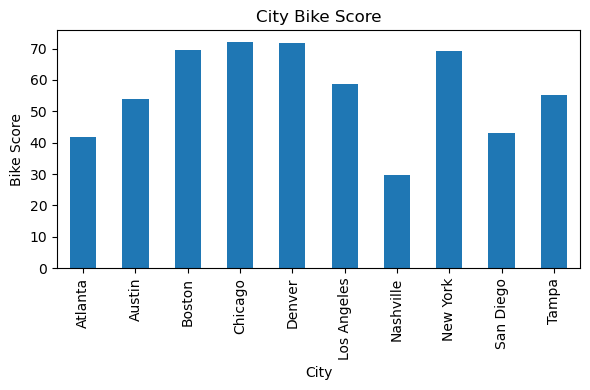

In [109]:
bike_score_chart = bike_score_df.plot(kind="bar", figsize=(6,4))
bike_score_chart.set_xlabel("City")
bike_score_chart.set_ylabel("Bike Score")
bike_score_chart.set_title("City Bike Score")
plt.tight_layout()
plt.show()

In [110]:
#Create a data series for each city's transit score

In [111]:
transit_score_df = sorted_urban_connectivity ["Transit Score"]
transit_score_df

City
Atlanta        43.7
Austin         34.8
Boston         72.4
Chicago        65.0
Denver         44.6
Los Angeles    52.9
Nashville      21.7
New York       88.6
San Diego      37.3
Tampa          31.3
Name: Transit Score, dtype: float64

In [112]:
#Create a bar graph for each city's Tranist Score

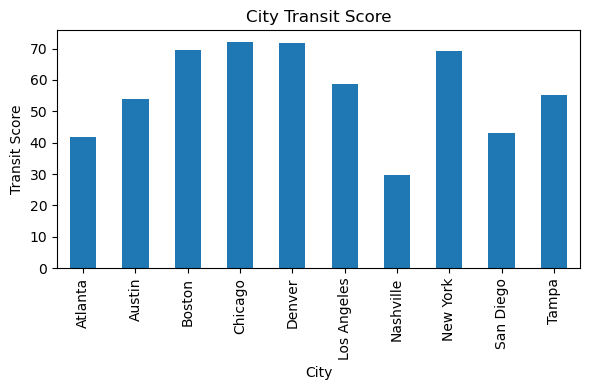

In [113]:
transit_score_chart = bike_score_df.plot(kind="bar", figsize=(6,4))
transit_score_chart.set_xlabel("City")
transit_score_chart.set_ylabel("Transit Score")
transit_score_chart.set_title("City Transit Score")
plt.tight_layout()
plt.show()

In [114]:
#create a data series for each cities' walk score

In [115]:
walk_score_df = sorted_urban_connectivity ["Walk Score"]
walk_score_df

City
Atlanta        47.7
Austin         41.7
Boston         82.8
Chicago        77.2
Denver         61.2
Los Angeles    68.6
Nashville      28.8
New York       88.0
San Diego      53.3
Tampa          49.5
Name: Walk Score, dtype: float64

In [116]:
#Create a bar graph for each city's Walk Score

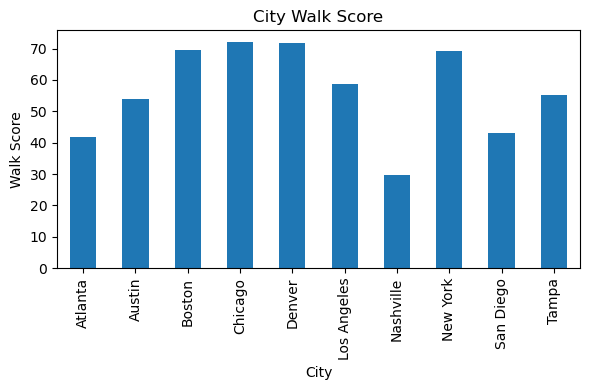

In [117]:
walk_score_chart = bike_score_df.plot(kind="bar", figsize=(6,4))
walk_score_chart.set_xlabel("City")
walk_score_chart.set_ylabel("Walk Score")
walk_score_chart.set_title("City Walk Score")
plt.tight_layout()
plt.show()

In [118]:
#Create a series to depect each city's Total Urban Score

In [119]:
total_urban_score_df = sorted_urban_connectivity ["Total Urban Score"]
total_urban_score_df

City
Atlanta        10.0
Austin          9.0
Boston         26.0
Chicago        26.0
Denver         21.0
Los Angeles    20.0
Nashville       3.0
New York       27.0
San Diego      12.0
Tampa          11.0
Name: Total Urban Score, dtype: float64

In [120]:
#Creat a bar graph for each city's Total Urban Score

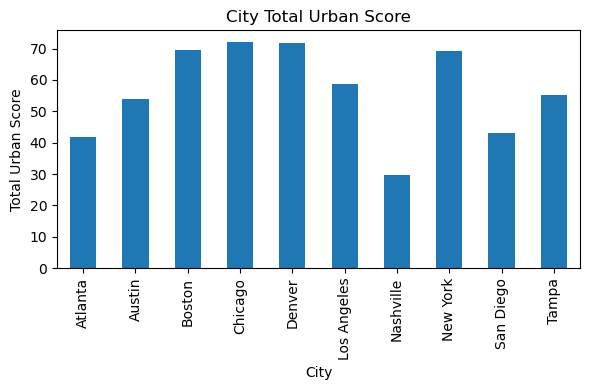

In [121]:
total_urban_score_chart = bike_score_df.plot(kind="bar", figsize=(6,4))
total_urban_score_chart.set_xlabel("City")
total_urban_score_chart.set_ylabel("Total Urban Score")
total_urban_score_chart.set_title("City Total Urban Score")
plt.tight_layout()
plt.show()

In [ ]:
#Print a head of the population dataframe from team members imported csv file

In [127]:
population.head(10)

,Rank,US State,Population 2024,Population 2020,Annual Change
US City,,,,,
New York,1,New York,8097282,8740292,-1.95%
Los Angeles,2,California,3795936,3895848,-0.65%
Chicago,3,Illinois,2638159,2743329,-0.99%
San Diego,8,California,1388996,1386292,0.05%
Austin,12,Texas,984567,965827,0.48%
Denver,19,Colorado,716234,717606,-0.05%
Boston,25,Massachusetts,646622,675466,-1.1%
Atlanta,36,Georgia,514465,499896,0.71%
Tampa,49,Florida,408510,387924,1.28%


In [ ]:
#Reset index of population dataframe for merging

In [143]:
population = population.reset_index()
population

,index,US City,Rank,US State,Population 2024,Population 2020,Annual Change
0,0,New York,1,New York,8097282,8740292,-1.95%
1,1,Los Angeles,2,California,3795936,3895848,-0.65%
2,2,Chicago,3,Illinois,2638159,2743329,-0.99%
3,3,San Diego,8,California,1388996,1386292,0.05%
4,4,Austin,12,Texas,984567,965827,0.48%
5,5,Denver,19,Colorado,716234,717606,-0.05%
6,6,Boston,25,Massachusetts,646622,675466,-1.1%
7,7,Atlanta,36,Georgia,514465,499896,0.71%
8,8,Tampa,49,Florida,408510,387924,1.28%


In [138]:
sorted_urban_connectivity

,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
City,,,,,,,,,
Atlanta,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
Austin,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
Boston,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
Chicago,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
Denver,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0
Los Angeles,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
Nashville,TN,29.7,1.0,21.7,1.0,28.8,1.0,3.0,1.0
New York,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
San Diego,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0


In [ ]:
#Reset Index of sorted urban connectivity dataframe for merging

In [141]:
sorted_urban_connectivity = sorted_urban_connectivity.reset_index()
sorted_urban_connectivity

,index,City,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
0,0,Atlanta,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
1,1,Austin,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
2,2,Boston,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
3,3,Chicago,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
4,4,Denver,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0
5,5,Los Angeles,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
6,6,Nashville,TN,29.7,1.0,21.7,1.0,28.8,1.0,3.0,1.0
7,7,New York,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
8,8,San Diego,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0
9,9,Tampa,FL,55.2,5.0,31.3,2.0,49.5,4.0,11.0,4.0


In [ ]:
#Rename city column in sorted urban connectivity dataframe to merge

In [144]:
sorted_urban_connectivity.rename(columns={'City': 'US City'}, inplace=True)
sorted_urban_connectivity

,index,US City,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
0,0,Atlanta,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
1,1,Austin,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
2,2,Boston,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
3,3,Chicago,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
4,4,Denver,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0
5,5,Los Angeles,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
6,6,Nashville,TN,29.7,1.0,21.7,1.0,28.8,1.0,3.0,1.0
7,7,New York,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
8,8,San Diego,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0
9,9,Tampa,FL,55.2,5.0,31.3,2.0,49.5,4.0,11.0,4.0


In [ ]:
#Merge population and urban connectivity dataframe

In [145]:
merged_popurban_df = pd.merge(population, sorted_urban_connectivity, on='US City') 
merged_popurban_df

,index_x,US City,Rank,US State,Population 2024,Population 2020,Annual Change,index_y,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
0,0,New York,1,New York,8097282,8740292,-1.95%,7,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
1,1,Los Angeles,2,California,3795936,3895848,-0.65%,5,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
2,2,Chicago,3,Illinois,2638159,2743329,-0.99%,3,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
3,3,San Diego,8,California,1388996,1386292,0.05%,8,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0
4,4,Austin,12,Texas,984567,965827,0.48%,1,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
5,5,Denver,19,Colorado,716234,717606,-0.05%,4,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0
6,6,Boston,25,Massachusetts,646622,675466,-1.1%,2,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
7,7,Atlanta,36,Georgia,514465,499896,0.71%,0,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
8,8,Tampa,49,Florida,408510,387924,1.28%,9,FL,55.2,5.0,31.3,2.0,49.5,4.0,11.0,4.0


In [ ]:
#Condense merged dataframe

In [159]:
cleaned_popurban_df = merged_popurban_df[["US State","US City","Population 2024", "Walk Score", "Transit Score", "Bike Score","Total Urban Score Rank"]]
cleaned_popurban_df

,US State,US City,Population 2024,Walk Score,Transit Score,Bike Score,Total Urban Score Rank
0,New York,New York,8097282,88.0,88.6,69.3,10.0
1,California,Los Angeles,3795936,68.6,52.9,58.7,6.0
2,Illinois,Chicago,2638159,77.2,65.0,72.2,8.5
3,California,San Diego,1388996,53.3,37.3,43.0,5.0
4,Texas,Austin,984567,41.7,34.8,54.0,2.0
5,Colorado,Denver,716234,61.2,44.6,71.8,7.0
6,Massachusetts,Boston,646622,82.8,72.4,69.4,8.5
7,Georgia,Atlanta,514465,47.7,43.7,41.7,3.0
8,Florida,Tampa,408510,49.5,31.3,55.2,4.0


In [160]:
#Reset indexes to city name for new cleaned and condensed dataframe

In [161]:
cleaned_popurban_df = cleaned_popurban_df.set_index("US City")

In [162]:
cleaned_popurban_df

,US State,Population 2024,Walk Score,Transit Score,Bike Score,Total Urban Score Rank
US City,,,,,,
New York,New York,8097282,88.0,88.6,69.3,10.0
Los Angeles,California,3795936,68.6,52.9,58.7,6.0
Chicago,Illinois,2638159,77.2,65.0,72.2,8.5
San Diego,California,1388996,53.3,37.3,43.0,5.0
Austin,Texas,984567,41.7,34.8,54.0,2.0
Denver,Colorado,716234,61.2,44.6,71.8,7.0
Boston,Massachusetts,646622,82.8,72.4,69.4,8.5
Atlanta,Georgia,514465,47.7,43.7,41.7,3.0
Tampa,Florida,408510,49.5,31.3,55.2,4.0


In [163]:
urban_connectivity_summary_stats_df = new_urban_connectivity_df.describe()
urban_connectivity_summary_df = new_urban_connectivity_df[['Walk Score', 'Transit Score', 'Bike Score']].agg(['mean', 'min', 'max'])
print(urban_connectivity_summary_stats_df)
urban_connectivity_summary_df

       Walk Score  Transit Score  Bike Score  Walk Score Rank  \
count   10.000000      10.000000   10.000000         10.00000   
mean    59.880000      49.230000   56.500000          5.50000   
std     19.118624      20.631586   14.693687          3.02765   
min     28.800000      21.700000   29.700000          1.00000   
25%     48.150000      35.425000   45.750000          3.25000   
50%     57.250000      44.150000   56.950000          5.50000   
75%     75.050000      61.975000   69.375000          7.75000   
max     88.000000      88.600000   72.200000         10.00000   

       Transit Score Rank  Bike Score Rank  Total Urban Score  \
count            10.00000         10.00000          10.000000   
mean              5.50000          5.50000          16.500000   
std               3.02765          3.02765           8.527733   
min               1.00000          1.00000           3.000000   
25%               3.25000          3.25000          10.250000   
50%               5.5000

,Walk Score,Transit Score,Bike Score
mean,59.88,49.23,56.5
min,28.80,21.70,29.7
max,88.00,88.60,72.2


In [247]:
xw = cleaned_popurban_df['Walk Score']  
yw = cleaned_popurban_df['Population 2024']  

In [248]:
pop = cleaned_popurban_df.iloc[:,1]
walk = cleaned_popurban_df.iloc[:,2]
popwalk_correlation = st.pearsonr(walk,pop)
print(f"The correlation between population and walk score is {round(popwalk_correlation[0],2)}")

The correlation between population and walk score is 0.65


In [249]:
(slope,intercept, r_value, p_value, std_err) = linregress(xw,yw)
print(f"Slope(m): {round(slope,2)}")
print(f"Intercept(b): {round(intercept,2)}")
print(f"correlation(r): {round(rvalue,2)}")

Slope(m): 98555.04
Intercept(b): -4109511.07
correlation(r): 0.65


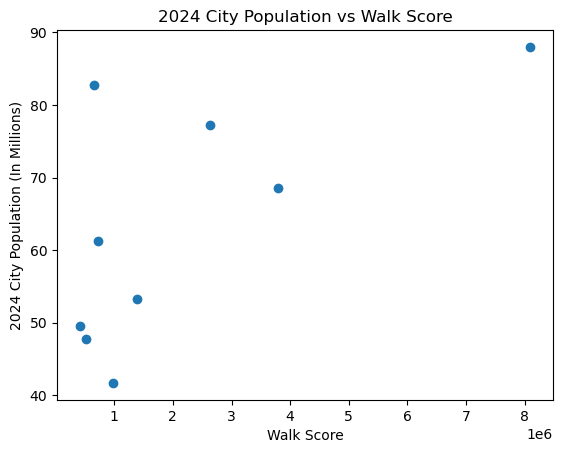

In [246]:
plt.xlabel("Walk Score")
plt.ylabel("2024 City Population (In Millions)")
plt.title("2024 City Population vs Walk Score")
plt.scatter(yw, xw)

In [208]:
xt = cleaned_popurban_df['Transit Score']  
yt = cleaned_popurban_df['Population 2024'] 

In [219]:
transit = cleaned_popurban_df.iloc[:,3]
poptransit_correlation = st.pearsonr(pop,transit)
print(f" The correlation between population and walk score is {round(poptransit_correlation[0],2)}")

 The correlation between population and walk score is 0.74


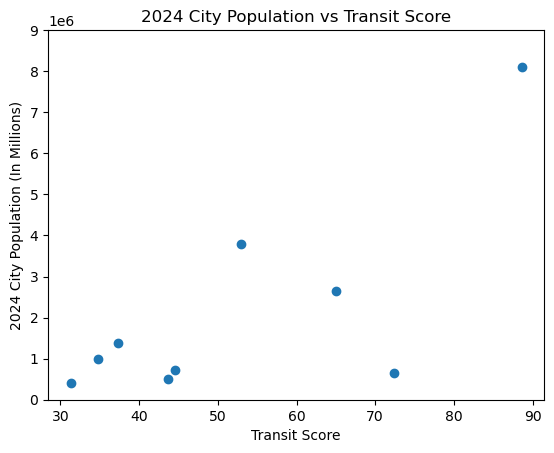

In [209]:
plt.xlabel("Transit Score")
plt.ylabel("2024 City Population (In Millions)")
plt.title("2024 City Population vs Transit Score")
plt.ylim(0,9000000)
plt.scatter(yt, xt)

In [178]:
x = cleaned_popurban_df['Bike Score']  
y = cleaned_popurban_df['Population 2024'] 

In [220]:
bike = cleaned_popurban_df.iloc[:,4]
popbike_correlation = st.pearsonr(pop,bike)
print(f" The correlation between population and walk score is {round(popbike_correlation[0],2)}")

 The correlation between population and walk score is 0.36


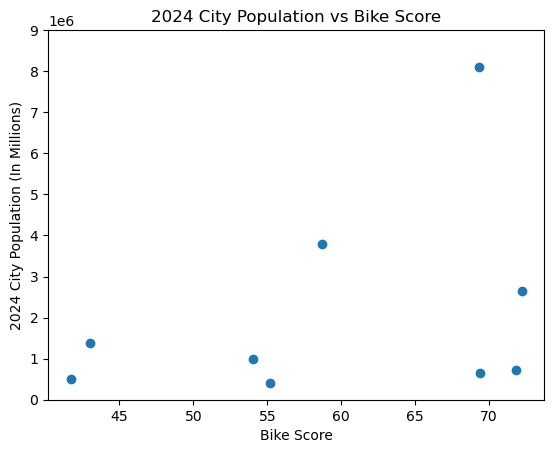

In [179]:
plt.xlabel("Bike Score")
plt.ylabel("2024 City Population (In Millions)")
plt.title("2024 City Population vs Bike Score")
plt.ylim(0,9000000)
plt.scatter(y, x)

In [180]:
x = cleaned_popurban_df['Total Urban Score Rank']  
y = cleaned_popurban_df['Population 2024'] 

In [221]:
urbrank = cleaned_popurban_df.iloc[:,5]
popurbrank_correlation = st.pearsonr(pop,urbrank)
print(f" The correlation between population and walk score is {round(popurbrank_correlation[0],2)}")

 The correlation between population and walk score is 0.61


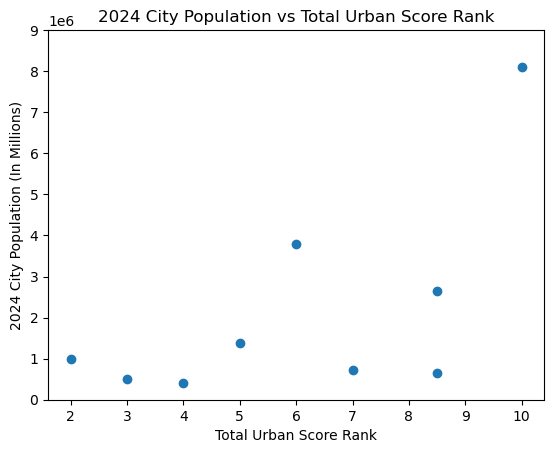

In [181]:
plt.xlabel("Total Urban Score Rank")
plt.ylabel("2024 City Population (In Millions)")
plt.title("2024 City Population vs Total Urban Score Rank")
plt.ylim(0,9000000)
plt.scatter(y, x)